# Outlier
### 1st method

### if data get out of range then it is known as outlier. Some times twe find the mean , median, mode of the data 
### but the outlier act as a distruction because of long range . Therefore it is necessary to remove the outlier 


#### example [1,2,3,4,6,7,8,9,100] so here 100 act as an outlier

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv("Online Sales Data.csv")
df["Total Revenue"]

0      1999.98
1       499.99
2       209.97
3        63.96
4        89.99
        ...   
235     159.99
236     270.00
237      32.97
238      55.00
239      59.98
Name: Total Revenue, Length: 240, dtype: float64

In [7]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,239.000000,238.000000,238.000000,239.000000
mean,10120.523013,2.163866,238.132143,336.309038
std,69.571003,1.325837,430.833360,486.731983
min,10001.000000,1.000000,6.500000,6.500000
25%,10060.500000,1.000000,29.622500,61.970000
50%,10121.000000,2.000000,89.995000,179.970000
75%,10180.500000,3.000000,249.990000,399.450000
max,10240.000000,10.000000,3899.990000,3899.990000


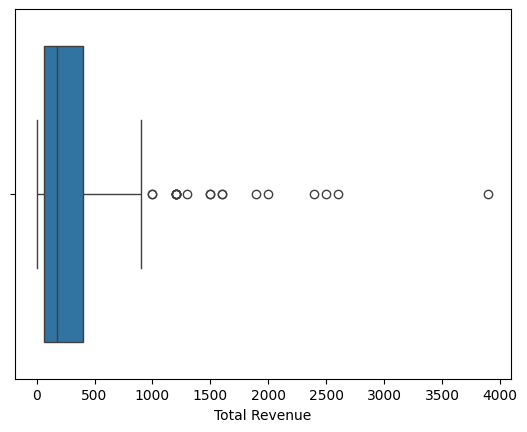

In [12]:
# here compair the mean and the maximun value . if there is lot of difference then 
# there is a high chances of outlier

# here we use box plot as it shows the oulier perfectly and also use normal distributon plot

sns.boxplot(x="Total Revenue",data=df)
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_24440\2136992520.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Total Revenue"])


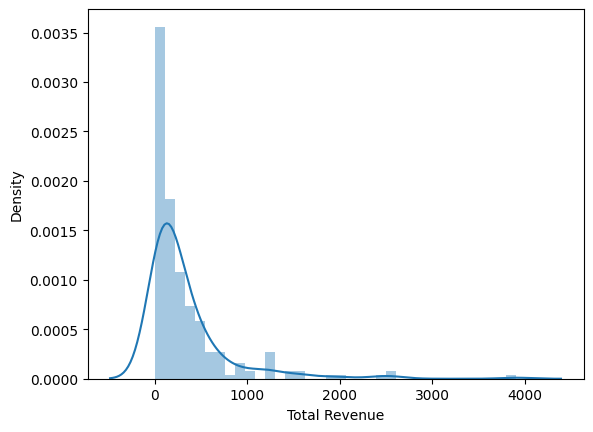

In [16]:
sns.distplot(df["Total Revenue"])
plt.show()
# you can see the tail at the down get long which so that there is a outlier

# IQR( Interquartile Range) method ( to remove outlier)
### 1st quantile -25%
### 2nd quantile -50%
### 3rd quantile -75%

# IQR =Q3 - Q1
# min =Q1-(1.5 x IQR)
# max =Q3+(1.5 x IQR)

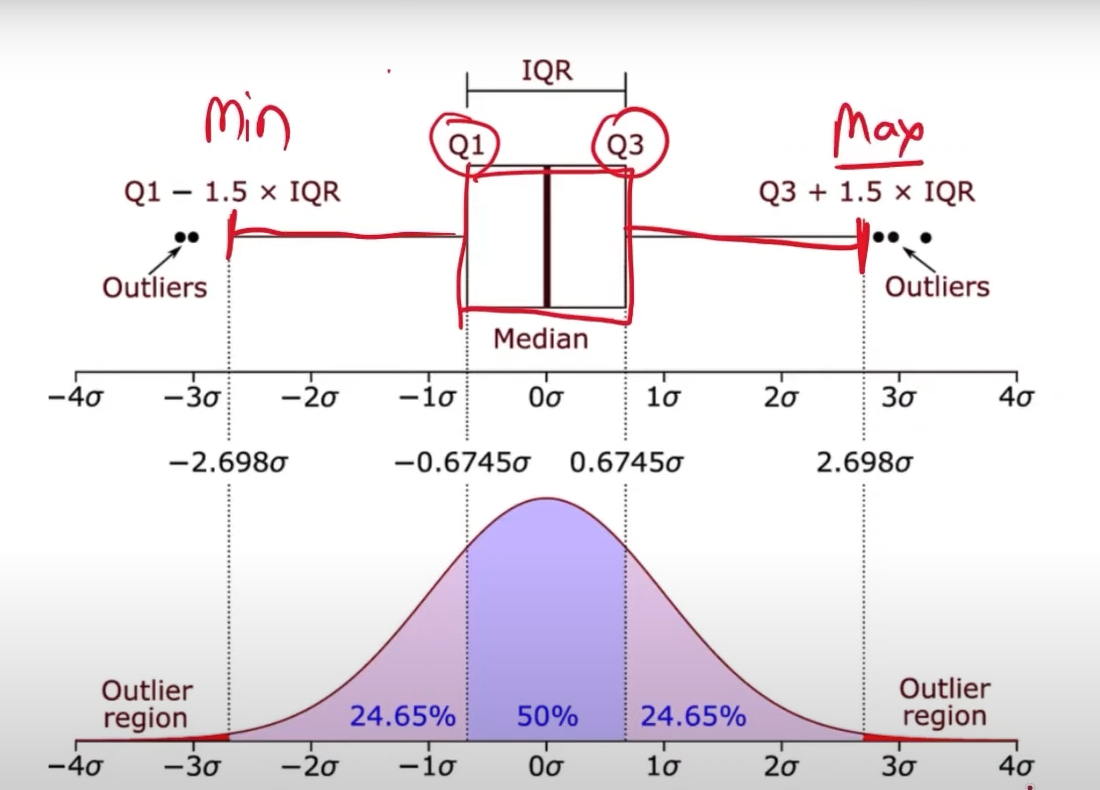


In [18]:
df.shape

(240, 9)

In [32]:
q1 = df["Total Revenue"].quantile(0.25)
q1

61.97

In [33]:
q3 = df["Total Revenue"].quantile(0.75)
q3

399.45

In [34]:
IQR=q3-q1

In [35]:
min_range= q1-(1.5*IQR)
max_range= q3+(1.5*IQR)
min_range,max_range

(-444.25, 905.6700000000001)

In [36]:
# now remove the outlier form the data set
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001.0,01-01-2024,NaN,iPhone 14 Pro,2.0,999.99,1999.98,North America,Credit Card
1,10002.0,02-01-2024,Home Appliances,Dyson V11 Vacuum,1.0,499.99,499.99,Europe,PayPal
2,10003.0,03-01-2024,Clothing,Levi's 501 Jeans,3.0,69.99,209.97,Asia,Debit Card
3,10004.0,04-01-2024,Books,The Da Vinci Code,4.0,15.99,63.96,North America,Credit Card
4,10005.0,05-01-2024,Beauty Products,Neutrogena Skincare Set,1.0,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236.0,23-08-2024,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1.0,159.99,159.99,Europe,PayPal
236,10237.0,24-08-2024,NaN,Nike Air Force 1 Sneakers,3.0,90.00,270.00,Asia,Debit Card
237,10238.0,25-08-2024,Books,The Handmaid's Tale by Margaret Atwood,3.0,10.99,32.97,North America,Credit Card
238,10239.0,26-08-2024,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1.0,55.00,55.00,Europe,PayPal


In [39]:
new_df=df[df["Total Revenue"]<=max_range]
new_df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
1,10002.0,02-01-2024,Home Appliances,Dyson V11 Vacuum,1.0,499.99,499.99,Europe,PayPal
2,10003.0,03-01-2024,Clothing,Levi's 501 Jeans,3.0,69.99,209.97,Asia,Debit Card
3,10004.0,04-01-2024,Books,The Da Vinci Code,4.0,15.99,63.96,North America,Credit Card
4,10005.0,05-01-2024,Beauty Products,Neutrogena Skincare Set,1.0,89.99,89.99,Europe,PayPal
5,10006.0,06-01-2024,Sports,Wilson Evolution Basketball,5.0,29.99,149.95,Asia,Credit Card
...,...,...,...,...,...,...,...,...,...
235,10236.0,23-08-2024,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1.0,159.99,159.99,Europe,PayPal
236,10237.0,24-08-2024,NaN,Nike Air Force 1 Sneakers,3.0,90.00,270.00,Asia,Debit Card
237,10238.0,25-08-2024,Books,The Handmaid's Tale by Margaret Atwood,3.0,10.99,32.97,North America,Credit Card
238,10239.0,26-08-2024,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1.0,55.00,55.00,Europe,PayPal


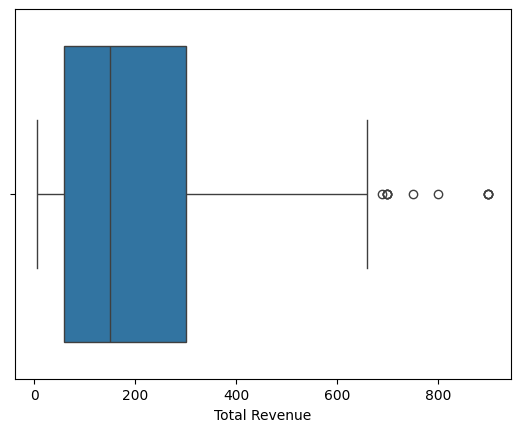

In [41]:
sns.boxplot(x="Total Revenue",data=new_df)
plt.show()
# just some otlier remains so ignore that because some time data loss takes place 

# Outlier removal using Z score (2nd method)